# Glassdoor Job Claeaning Data
------


# 1) Import Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import SVR
from sklearn.ensemble import AdaBoostRegressor

from sklearn.model_selection import train_test_split

from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

# 2) Load Data

In [2]:
data = pd.read_csv('/content/glassdoor_jobs.csv')

# 3) Data Exploration

In [3]:
data.shape

(956, 15)

In [4]:
data.head(3)

,Unnamed: 0,Job Title,Salary Estimate,Job Description,Rating,Company Name,Location,Headquarters,Size,Founded,Type of ownership,Industry,Sector,Revenue,Competitors
0,0,Data Scientist,$53K-$91K (Glassdoor est.),"Data Scientist\nLocation: Albuquerque, NM\nEdu...",3.8,Tecolote Research\n3.8,"Albuquerque, NM","Goleta, CA",501 to 1000 employees,1973,Company - Private,Aerospace & Defense,Aerospace & Defense,$50 to $100 million (USD),-1
1,1,Healthcare Data Scientist,$63K-$112K (Glassdoor est.),What You Will Do:\n\nI. General Summary\n\nThe...,3.4,University of Maryland Medical System\n3.4,"Linthicum, MD","Baltimore, MD",10000+ employees,1984,Other Organization,Health Care Services & Hospitals,Health Care,$2 to $5 billion (USD),-1
2,2,Data Scientist,$80K-$90K (Glassdoor est.),"KnowBe4, Inc. is a high growth information sec...",4.8,KnowBe4\n4.8,"Clearwater, FL","Clearwater, FL",501 to 1000 employees,2010,Company - Private,Security Services,Business Services,$100 to $500 million (USD),-1


In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 956 entries, 0 to 955
Data columns (total 15 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Unnamed: 0         956 non-null    int64  
 1   Job Title          956 non-null    object 
 2   Salary Estimate    956 non-null    object 
 3   Job Description    956 non-null    object 
 4   Rating             956 non-null    float64
 5   Company Name       956 non-null    object 
 6   Location           956 non-null    object 
 7   Headquarters       956 non-null    object 
 8   Size               956 non-null    object 
 9   Founded            956 non-null    int64  
 10  Type of ownership  956 non-null    object 
 11  Industry           956 non-null    object 
 12  Sector             956 non-null    object 
 13  Revenue            956 non-null    object 
 14  Competitors        956 non-null    object 
dtypes: float64(1), int64(2), object(12)
memory usage: 112.2+ KB


In [6]:
data.isnull().sum()

,0
Unnamed: 0,0
Job Title,0
Salary Estimate,0
Job Description,0
Rating,0
Company Name,0
Location,0
Headquarters,0
Size,0
Founded,0


In [7]:
data.describe()

,Unnamed: 0,Rating,Founded
count,956.000000,956.000000,956.000000
mean,477.500000,3.601255,1774.605649
std,276.117729,1.067619,598.942517
min,0.000000,-1.000000,-1.000000
25%,238.750000,3.300000,1937.000000
50%,477.500000,3.800000,1992.000000
75%,716.250000,4.200000,2008.000000
max,955.000000,5.000000,2019.000000


# 4) Data Cleaning

In [8]:
data.columns

Index(['Unnamed: 0', 'Job Title', 'Salary Estimate', 'Job Description',
       'Rating', 'Company Name', 'Location', 'Headquarters', 'Size', 'Founded',
       'Type of ownership', 'Industry', 'Sector', 'Revenue', 'Competitors'],
      dtype='object')

# Dealing With column 'Salary Estimate'

In [9]:
data['Salary Estimate']

,Salary Estimate
0,$53K-$91K (Glassdoor est.)
1,$63K-$112K (Glassdoor est.)
2,$80K-$90K (Glassdoor est.)
3,$56K-$97K (Glassdoor est.)
4,$86K-$143K (Glassdoor est.)
...,...
951,$72K-$133K (Glassdoor est.)
952,$56K-$91K (Glassdoor est.)
953,$95K-$160K (Glassdoor est.)
954,-1


In [10]:
data['Salary Estimate'].value_counts()

,count
Salary Estimate,
-1,214
$86K-$143K (Glassdoor est.),6
$54K-$115K (Glassdoor est.),6
$49K-$113K (Glassdoor est.),6
$21-$34 Per Hour(Glassdoor est.),6
...,...
$74K-$119K (Glassdoor est.),1
$55K-$97K (Glassdoor est.),1
$15K-$16K(Employer est.),1


In [11]:
data['Salary Estimate'].dtype

dtype('O')

In [12]:
data = data[data['Salary Estimate'] != '-1']

In [13]:
data['Salary Estimate']

,Salary Estimate
0,$53K-$91K (Glassdoor est.)
1,$63K-$112K (Glassdoor est.)
2,$80K-$90K (Glassdoor est.)
3,$56K-$97K (Glassdoor est.)
4,$86K-$143K (Glassdoor est.)
...,...
950,$58K-$111K (Glassdoor est.)
951,$72K-$133K (Glassdoor est.)
952,$56K-$91K (Glassdoor est.)
953,$95K-$160K (Glassdoor est.)


# delete (Glassdoor est.)

In [14]:
salary = data['Salary Estimate'].apply(lambda x: x.split('('))
salary

,Salary Estimate
0,"[$53K-$91K , Glassdoor est.)]"
1,"[$63K-$112K , Glassdoor est.)]"
2,"[$80K-$90K , Glassdoor est.)]"
3,"[$56K-$97K , Glassdoor est.)]"
4,"[$86K-$143K , Glassdoor est.)]"
...,...
950,"[$58K-$111K , Glassdoor est.)]"
951,"[$72K-$133K , Glassdoor est.)]"
952,"[$56K-$91K , Glassdoor est.)]"
953,"[$95K-$160K , Glassdoor est.)]"


In [15]:
salary = data['Salary Estimate'].apply(lambda x: x.split('(')[0])
salary

,Salary Estimate
0,$53K-$91K
1,$63K-$112K
2,$80K-$90K
3,$56K-$97K
4,$86K-$143K
...,...
950,$58K-$111K
951,$72K-$133K
952,$56K-$91K
953,$95K-$160K


In [16]:
salary = salary.apply(lambda x: x.replace('K','').replace('$',''))
salary

,Salary Estimate
0,53-91
1,63-112
2,80-90
3,56-97
4,86-143
...,...
950,58-111
951,72-133
952,56-91
953,95-160


In [17]:
salary.dtype

dtype('O')

In [18]:
salary.unique()

array(['53-91 ', '63-112 ', '80-90 ', '56-97 ', '86-143 ', '71-119 ',
       '54-93 ', '86-142 ', '38-84 ', '120-160 ', '126-201 ', '64-106 ',
       '106-172 ', '46-85 ', '83-144 ', '102-190 ', '67-137 ', '118-189 ',
       '110-175 ', '64-111 ', '81-130 ', '73-119 ', '86-139 ', '63-105 ',
       '109-177 ', '63-110 ', '75-124 ', '34-61 ', '72-120 ', '93-149 ',
       '85-140 ', '77-135 ', '82-132 ', '83-137 ', '115-180 ', '74-138 ',
       '64-112 ', '68-129 ', '52-113 ', '110-150',
       'Employer Provided Salary:150-160', '158-211 ', '20-39 ',
       '56-117 ', '63-99 ', '68-114 ', '41-95 ', '86-144 ', '80-139 ',
       '56-95 ', '120-189 ', '111-176 ', '84-146 ', '107-172 ', '49-85 ',
       '61-109 ', '88-148 ', '60-99 ', '41-72 ', '96-161 ', '65-130 ',
       '52-81 ', '139-220 ', '50-102 ', '85-139 ', '74-122 ', '99-157 ',
       '79-222 ', '57-118 ', '86-141 ', '94-154 ', '37-76 ', '100-160 ',
       '55-100 ', '60-114 ', '39-68 ', '64-107 ', '31-65 ', '34-62 ',
       '117-2

In [19]:
salary = salary.apply(lambda x: x.lower().replace('employer provided salary:','').replace('per hour',''))
salary

,Salary Estimate
0,53-91
1,63-112
2,80-90
3,56-97
4,86-143
...,...
950,58-111
951,72-133
952,56-91
953,95-160


In [20]:
salary.unique()

array(['53-91 ', '63-112 ', '80-90 ', '56-97 ', '86-143 ', '71-119 ',
       '54-93 ', '86-142 ', '38-84 ', '120-160 ', '126-201 ', '64-106 ',
       '106-172 ', '46-85 ', '83-144 ', '102-190 ', '67-137 ', '118-189 ',
       '110-175 ', '64-111 ', '81-130 ', '73-119 ', '86-139 ', '63-105 ',
       '109-177 ', '63-110 ', '75-124 ', '34-61 ', '72-120 ', '93-149 ',
       '85-140 ', '77-135 ', '82-132 ', '83-137 ', '115-180 ', '74-138 ',
       '64-112 ', '68-129 ', '52-113 ', '110-150', '150-160', '158-211 ',
       '20-39 ', '56-117 ', '63-99 ', '68-114 ', '41-95 ', '86-144 ',
       '80-139 ', '56-95 ', '120-189 ', '111-176 ', '84-146 ', '107-172 ',
       '49-85 ', '61-109 ', '88-148 ', '60-99 ', '41-72 ', '96-161 ',
       '65-130 ', '52-81 ', '139-220 ', '50-102 ', '85-139 ', '74-122 ',
       '99-157 ', '79-222 ', '57-118 ', '86-141 ', '94-154 ', '37-76 ',
       '100-160 ', '55-100 ', '60-114 ', '39-68 ', '64-107 ', '31-65 ',
       '34-62 ', '117-231 ', '79-134 ', '52-93 ', '55-1

In [21]:
salary = salary.apply(lambda x :x.split('-'))
salary

,Salary Estimate
0,"[53, 91 ]"
1,"[63, 112 ]"
2,"[80, 90 ]"
3,"[56, 97 ]"
4,"[86, 143 ]"
...,...
950,"[58, 111 ]"
951,"[72, 133 ]"
952,"[56, 91 ]"
953,"[95, 160 ]"


In [22]:
salary.dtype

dtype('O')

In [23]:
data['Min_Salary'] = salary.apply(lambda x: x[0])
data['Max_Salary'] = salary.apply(lambda x: x[1])

In [24]:
data.drop('Salary Estimate', axis=1, inplace = True)

In [25]:
data.head(3)

,Unnamed: 0,Job Title,Job Description,Rating,Company Name,Location,Headquarters,Size,Founded,Type of ownership,Industry,Sector,Revenue,Competitors,Min_Salary,Max_Salary
0,0,Data Scientist,"Data Scientist\nLocation: Albuquerque, NM\nEdu...",3.8,Tecolote Research\n3.8,"Albuquerque, NM","Goleta, CA",501 to 1000 employees,1973,Company - Private,Aerospace & Defense,Aerospace & Defense,$50 to $100 million (USD),-1,53,91
1,1,Healthcare Data Scientist,What You Will Do:\n\nI. General Summary\n\nThe...,3.4,University of Maryland Medical System\n3.4,"Linthicum, MD","Baltimore, MD",10000+ employees,1984,Other Organization,Health Care Services & Hospitals,Health Care,$2 to $5 billion (USD),-1,63,112
2,2,Data Scientist,"KnowBe4, Inc. is a high growth information sec...",4.8,KnowBe4\n4.8,"Clearwater, FL","Clearwater, FL",501 to 1000 employees,2010,Company - Private,Security Services,Business Services,$100 to $500 million (USD),-1,80,90


In [26]:
data['Min_Salary'].unique()

array(['53', '63', '80', '56', '86', '71', '54', '38', '120', '126', '64',
       '106', '46', '83', '102', '67', '118', '110', '81', '73', '109',
       '75', '34', '72', '93', '85', '77', '82', '115', '74', '68', '52',
       '150', '158', '20', '41', '111', '84', '107', '49', '61', '88',
       '60', '96', '65', '139', '50', '99', '79', '57', '94', '37', '100',
       '55', '39', '31', '117', '40', '89', '200', '121', '76', '91',
       '95', '43', '29', '26', '112', '51', '113', '59', '44', '124',
       '131', '132', '17', '42', '116', '48', '105', '98', '21', '114',
       '108', '90', '138', '190', '35', '18', '69', '66', '15', '33',
       '62', '127', '78', '45', '70', '130', '92', '36', '97', '24',
       '202', '32', '87', '25', '101', '125', '10', '47', '176', '135',
       '129', '119', '27', '58', '136', '171'], dtype=object)

In [27]:
data['Min_Salary'] = data['Min_Salary'].astype(int)
data['Max_Salary'] = data['Max_Salary'].astype(int)

In [28]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 742 entries, 0 to 955
Data columns (total 16 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Unnamed: 0         742 non-null    int64  
 1   Job Title          742 non-null    object 
 2   Job Description    742 non-null    object 
 3   Rating             742 non-null    float64
 4   Company Name       742 non-null    object 
 5   Location           742 non-null    object 
 6   Headquarters       742 non-null    object 
 7   Size               742 non-null    object 
 8   Founded            742 non-null    int64  
 9   Type of ownership  742 non-null    object 
 10  Industry           742 non-null    object 
 11  Sector             742 non-null    object 
 12  Revenue            742 non-null    object 
 13  Competitors        742 non-null    object 
 14  Min_Salary         742 non-null    int64  
 15  Max_Salary         742 non-null    int64  
dtypes: float64(1), int64(4), object

In [29]:
data['AVG_Salary'] = (data['Max_Salary'] + data['Max_Salary']) / 2


In [30]:
data.head(2)

,Unnamed: 0,Job Title,Job Description,Rating,Company Name,Location,Headquarters,Size,Founded,Type of ownership,Industry,Sector,Revenue,Competitors,Min_Salary,Max_Salary,AVG_Salary
0,0,Data Scientist,"Data Scientist\nLocation: Albuquerque, NM\nEdu...",3.8,Tecolote Research\n3.8,"Albuquerque, NM","Goleta, CA",501 to 1000 employees,1973,Company - Private,Aerospace & Defense,Aerospace & Defense,$50 to $100 million (USD),-1,53,91,91.0
1,1,Healthcare Data Scientist,What You Will Do:\n\nI. General Summary\n\nThe...,3.4,University of Maryland Medical System\n3.4,"Linthicum, MD","Baltimore, MD",10000+ employees,1984,Other Organization,Health Care Services & Hospitals,Health Care,$2 to $5 billion (USD),-1,63,112,112.0


In [31]:
data['AVG_Salary'].dtype

dtype('float64')

# Deal With 'Company Name' Column

In [32]:
data['Company Name']

,Company Name
0,Tecolote Research\n3.8
1,University of Maryland Medical System\n3.4
2,KnowBe4\n4.8
3,PNNL\n3.8
4,Affinity Solutions\n2.9
...,...
950,GSK\n3.9
951,Eventbrite\n4.4
952,Software Engineering Institute\n2.6
953,"Numeric, LLC\n3.2"


In [33]:
data[['Company Name','Rating']].sort_values(by='Rating' , ascending=False)

,Company Name,Rating
477,BPA Services\n5.0,5.0
542,Royce Geospatial\n5.0,5.0
48,BPA Services\n5.0,5.0
893,SkySync\n5.0,5.0
161,Gridiron IT\n5.0,5.0
...,...,...
778,Kronos Bio,-1.0
208,CA-One Tech Cloud,-1.0
819,Kronos Bio,-1.0
518,Kronos Bio,-1.0


# Way 1

In [34]:
#compony = data['Company Name'].apply(lambda x: x.split('\n'))
#data['Company Name'] = compony.apply(lambda x :x[0])
#data['Rating'] = compony.apply(lambda x :x[1] if len(x)>1 else -1.0)
#data.head(2)

# Way 2 More Efficient


In [35]:
data['Company Name'] = data.apply(lambda x: x['Company Name'] if x['Rating'] < 0 else x['Company Name'][:-4], axis=1)

In [36]:
data.head(3)

,Unnamed: 0,Job Title,Job Description,Rating,Company Name,Location,Headquarters,Size,Founded,Type of ownership,Industry,Sector,Revenue,Competitors,Min_Salary,Max_Salary,AVG_Salary
0,0,Data Scientist,"Data Scientist\nLocation: Albuquerque, NM\nEdu...",3.8,Tecolote Research,"Albuquerque, NM","Goleta, CA",501 to 1000 employees,1973,Company - Private,Aerospace & Defense,Aerospace & Defense,$50 to $100 million (USD),-1,53,91,91.0
1,1,Healthcare Data Scientist,What You Will Do:\n\nI. General Summary\n\nThe...,3.4,University of Maryland Medical System,"Linthicum, MD","Baltimore, MD",10000+ employees,1984,Other Organization,Health Care Services & Hospitals,Health Care,$2 to $5 billion (USD),-1,63,112,112.0
2,2,Data Scientist,"KnowBe4, Inc. is a high growth information sec...",4.8,KnowBe4,"Clearwater, FL","Clearwater, FL",501 to 1000 employees,2010,Company - Private,Security Services,Business Services,$100 to $500 million (USD),-1,80,90,90.0


# Deal With 'Location' column

In [37]:
data['Location']

,Location
0,"Albuquerque, NM"
1,"Linthicum, MD"
2,"Clearwater, FL"
3,"Richland, WA"
4,"New York, NY"
...,...
950,"Cambridge, MA"
951,"Nashville, TN"
952,"Pittsburgh, PA"
953,"Allentown, PA"


In [38]:
data['City']= data['Location'].apply(lambda x: x.split(',')[0])
data['State']= data['Location'].apply(lambda x: x.split(',')[1])

In [39]:
data.head(3)

,Unnamed: 0,Job Title,Job Description,Rating,Company Name,Location,Headquarters,Size,Founded,Type of ownership,Industry,Sector,Revenue,Competitors,Min_Salary,Max_Salary,AVG_Salary,City,State
0,0,Data Scientist,"Data Scientist\nLocation: Albuquerque, NM\nEdu...",3.8,Tecolote Research,"Albuquerque, NM","Goleta, CA",501 to 1000 employees,1973,Company - Private,Aerospace & Defense,Aerospace & Defense,$50 to $100 million (USD),-1,53,91,91.0,Albuquerque,NM
1,1,Healthcare Data Scientist,What You Will Do:\n\nI. General Summary\n\nThe...,3.4,University of Maryland Medical System,"Linthicum, MD","Baltimore, MD",10000+ employees,1984,Other Organization,Health Care Services & Hospitals,Health Care,$2 to $5 billion (USD),-1,63,112,112.0,Linthicum,MD
2,2,Data Scientist,"KnowBe4, Inc. is a high growth information sec...",4.8,KnowBe4,"Clearwater, FL","Clearwater, FL",501 to 1000 employees,2010,Company - Private,Security Services,Business Services,$100 to $500 million (USD),-1,80,90,90.0,Clearwater,FL


In [40]:
data['Same State'] = data.apply(lambda x: 1 if x.Location == x.Headquarters else 0, axis=1)

In [41]:
data[['Location', 'Headquarters' , 'Same State' ]] .head(10)

,Location,Headquarters,Same State
0,"Albuquerque, NM","Goleta, CA",0
1,"Linthicum, MD","Baltimore, MD",0
2,"Clearwater, FL","Clearwater, FL",1
3,"Richland, WA","Richland, WA",1
4,"New York, NY","New York, NY",1
5,"Dallas, TX","Dallas, TX",1
6,"Baltimore, MD","Baltimore, MD",1
7,"San Jose, CA","Seattle, WA",0
8,"Rochester, NY","Rochester, NY",1
9,"New York, NY","New York, NY",1


# Dealing with 'Founded' column

In [42]:
data['Founded'].value_counts()

,count
Founded,
-1,50
2010,32
2008,31
1996,27
2006,24
...,...
1860,1
1942,1
1878,1


In [43]:
data['Age_Of_Company'] = data.Founded.apply(lambda x: x if x <1 else 2025-x)

# Dealing with 'Job Description' Column

In [44]:
data['Job Description']

,Job Description
0,"Data Scientist\nLocation: Albuquerque, NM\nEdu..."
1,What You Will Do:\n\nI. General Summary\n\nThe...
2,"KnowBe4, Inc. is a high growth information sec..."
3,*Organization and Job ID**\nJob ID: 310709\n\n...
4,Data Scientist\nAffinity Solutions / Marketing...
...,...
950,Site Name: USA - Massachusetts - Cambridge\nPo...
951,THE CHALLENGE\nEventbrite has a world-class da...
952,The Auton Lab at Carnegie Mellon University is...
953,Data Science ManagerResponsibilities:\n\nOvers...


In [45]:
data['Python'] = data['Job Description'].apply(lambda x: 1 if 'python' in x.lower() else 0)
data['Python'].value_counts()

,count
Python,
1,392
0,350


In [46]:
data['R Studio'] = data['Job Description'].apply(lambda x: 1 if 'r studio' in x.lower() or 'r-studio' in x.lower() else 0)
data['R Studio'].value_counts()


,count
R Studio,
0,740
1,2


In [47]:
data['Spark'] = data['Job Description'].apply(lambda x: 1 if 'spark' in x.lower() else 0)
data['Spark'].value_counts()

,count
Spark,
0,575
1,167


In [48]:
data['AWS'] = data['Job Description'].apply(lambda x: 1 if 'aws' in x.lower() else 0)
data['AWS'].value_counts()

,count
AWS,
0,566
1,176


In [49]:
data['EXCEL'] = data['Job Description'].apply(lambda x: 1 if 'excel' in x.lower() else 0)
data['EXCEL'].value_counts()

,count
EXCEL,
1,388
0,354


In [50]:
data.head(3)

,Unnamed: 0,Job Title,Job Description,Rating,Company Name,Location,Headquarters,Size,Founded,Type of ownership,...,AVG_Salary,City,State,Same State,Age_Of_Company,Python,R Studio,Spark,AWS,EXCEL
0,0,Data Scientist,"Data Scientist\nLocation: Albuquerque, NM\nEdu...",3.8,Tecolote Research,"Albuquerque, NM","Goleta, CA",501 to 1000 employees,1973,Company - Private,...,91.0,Albuquerque,NM,0,52,1,0,0,0,1
1,1,Healthcare Data Scientist,What You Will Do:\n\nI. General Summary\n\nThe...,3.4,University of Maryland Medical System,"Linthicum, MD","Baltimore, MD",10000+ employees,1984,Other Organization,...,112.0,Linthicum,MD,0,41,1,0,0,0,0
2,2,Data Scientist,"KnowBe4, Inc. is a high growth information sec...",4.8,KnowBe4,"Clearwater, FL","Clearwater, FL",501 to 1000 employees,2010,Company - Private,...,90.0,Clearwater,FL,1,15,1,0,1,0,1


In [51]:
data.columns

Index(['Unnamed: 0', 'Job Title', 'Job Description', 'Rating', 'Company Name',
       'Location', 'Headquarters', 'Size', 'Founded', 'Type of ownership',
       'Industry', 'Sector', 'Revenue', 'Competitors', 'Min_Salary',
       'Max_Salary', 'AVG_Salary', 'City', 'State', 'Same State',
       'Age_Of_Company', 'Python', 'R Studio', 'Spark', 'AWS', 'EXCEL'],
      dtype='object')

# Drop Cols

In [52]:
#data.drop('Unnamed: 0', axis=1, inplace=True)
#if there are many cols
data.drop(columns=['Unnamed: 0'] , axis=1, inplace= True)

In [53]:
data.shape

(742, 25)

# 5) Save Cleaned Data to CSV File

In [54]:
data.to_csv('Cleand_Glassdoor_Jobs_Data.csv', index=False)

# 6) Exploratory Data Analysis & Visulization

In [55]:
df = pd.read_csv('/content/Cleand_Glassdoor_Jobs_Data.csv')

In [56]:
df.shape

(742, 25)

In [57]:
df.head(3)

,Job Title,Job Description,Rating,Company Name,Location,Headquarters,Size,Founded,Type of ownership,Industry,...,AVG_Salary,City,State,Same State,Age_Of_Company,Python,R Studio,Spark,AWS,EXCEL
0,Data Scientist,"Data Scientist\nLocation: Albuquerque, NM\nEdu...",3.8,Tecolote Research,"Albuquerque, NM","Goleta, CA",501 to 1000 employees,1973,Company - Private,Aerospace & Defense,...,91.0,Albuquerque,NM,0,52,1,0,0,0,1
1,Healthcare Data Scientist,What You Will Do:\n\nI. General Summary\n\nThe...,3.4,University of Maryland Medical System,"Linthicum, MD","Baltimore, MD",10000+ employees,1984,Other Organization,Health Care Services & Hospitals,...,112.0,Linthicum,MD,0,41,1,0,0,0,0
2,Data Scientist,"KnowBe4, Inc. is a high growth information sec...",4.8,KnowBe4,"Clearwater, FL","Clearwater, FL",501 to 1000 employees,2010,Company - Private,Security Services,...,90.0,Clearwater,FL,1,15,1,0,1,0,1


# Distribution


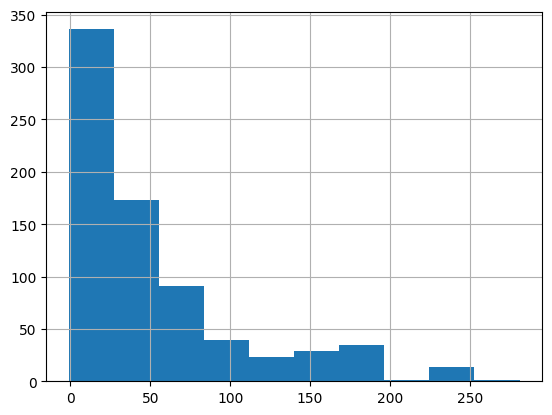

In [58]:
df['Age_Of_Company'].hist()
plt.show()

<Axes: >

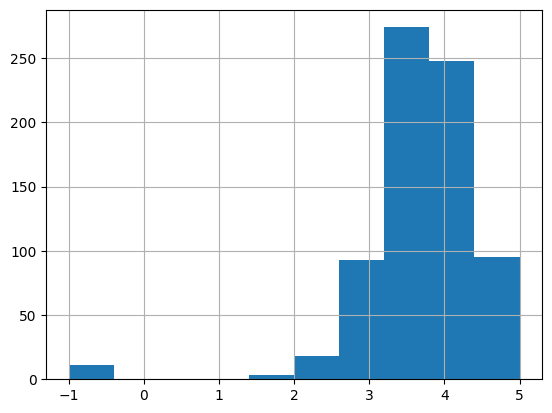

In [59]:
df.Rating.hist()

<Axes: xlabel='State'>

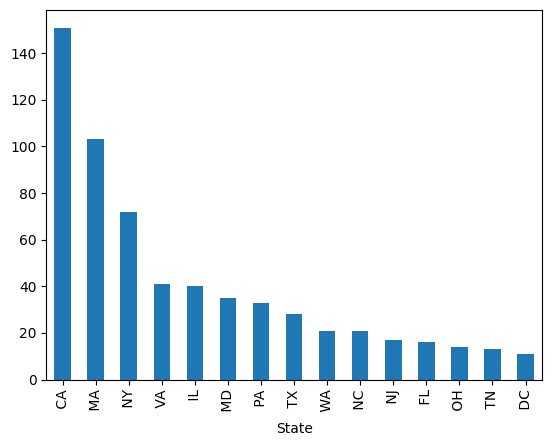

In [60]:
df.State.value_counts()[:15].plot(kind='bar')

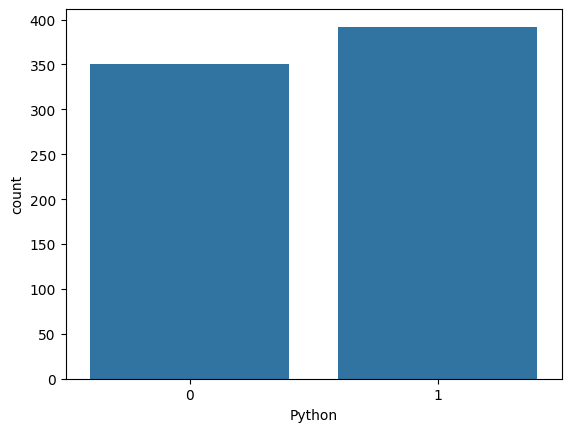

In [61]:
sns.countplot(data=data , x='Python' )
plt.show()

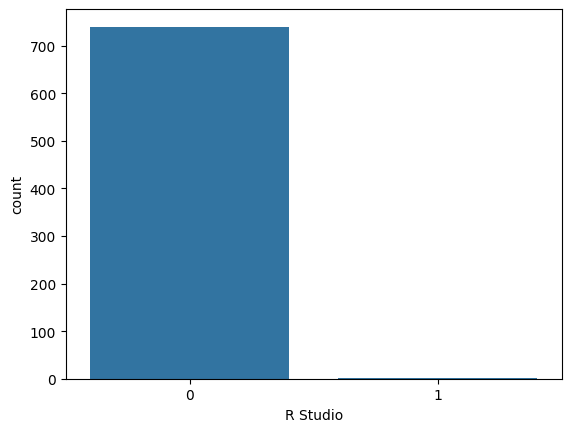

In [62]:
sns.countplot(data=data , x='R Studio' )
plt.show()

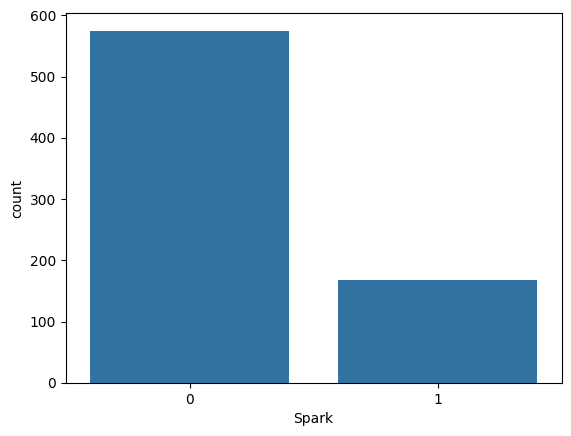

In [63]:
sns.countplot(data=data , x='Spark' )
plt.show()

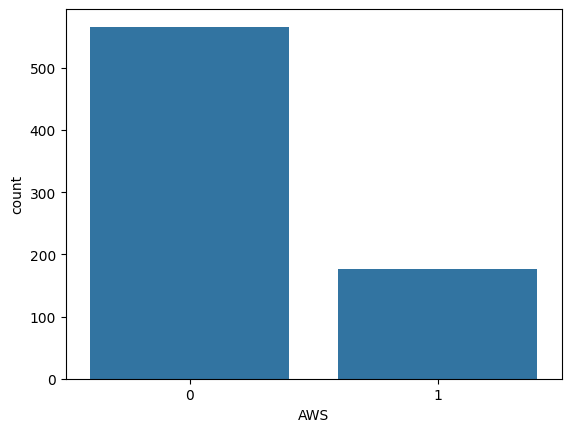

In [64]:
sns.countplot(data=data , x='AWS' )
plt.show()

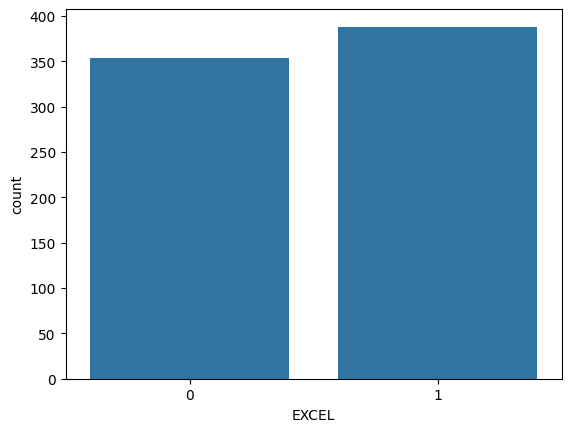

In [65]:
sns.countplot(data=data , x='EXCEL' )
plt.show()

In [66]:
df_Num = df.select_dtypes(include=np.number)

df_Num

,Rating,Founded,Min_Salary,Max_Salary,AVG_Salary,Same State,Age_Of_Company,Python,R Studio,Spark,AWS,EXCEL
0,3.8,1973,53,91,91.0,0,52,1,0,0,0,1
1,3.4,1984,63,112,112.0,0,41,1,0,0,0,0
2,4.8,2010,80,90,90.0,1,15,1,0,1,0,1
3,3.8,1965,56,97,97.0,1,60,1,0,0,0,0
4,2.9,1998,86,143,143.0,1,27,1,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...
737,3.9,1830,58,111,111.0,0,195,0,0,0,1,0
738,4.4,2006,72,133,133.0,0,19,1,0,1,1,0
739,2.6,1984,56,91,91.0,1,41,0,0,0,0,1
740,3.2,-1,95,160,160.0,0,-1,0,0,0,0,1


In [67]:
corr = df_Num.corr()
corr

,Rating,Founded,Min_Salary,Max_Salary,AVG_Salary,Same State,Age_Of_Company,Python,R Studio,Spark,AWS,EXCEL
Rating,1.000000,0.332927,-0.007825,0.027668,0.027668,0.085033,0.029151,0.144665,-0.004472,0.156982,0.117049,-0.036466
Founded,0.332927,1.000000,-0.038513,0.001069,0.001069,0.171512,0.156964,0.103183,0.016045,0.066978,-0.011123,-0.035567
Min_Salary,-0.007825,-0.038513,1.000000,0.944186,0.944186,-0.045114,0.000824,0.339425,-0.040105,0.171094,0.168418,-0.062074
Max_Salary,0.027668,0.001069,0.944186,1.000000,1.000000,-0.026738,0.031323,0.312443,-0.039019,0.176259,0.169494,-0.052674
AVG_Salary,0.027668,0.001069,0.944186,1.000000,1.000000,-0.026738,0.031323,0.312443,-0.039019,0.176259,0.169494,-0.052674
Same State,0.085033,0.171512,-0.045114,-0.026738,-0.026738,1.000000,-0.162229,0.006975,-0.058407,-0.053139,-0.065070,0.106026
Age_Of_Company,0.029151,0.156964,0.000824,0.031323,0.031323,-0.162229,1.000000,-0.096486,-0.016114,-0.100925,-0.033224,0.038095
Python,0.144665,0.103183,0.339425,0.312443,0.312443,0.006975,-0.096486,1.000000,0.049124,0.347619,0.203221,-0.021519
R Studio,-0.004472,0.016045,-0.040105,-0.039019,-0.039019,-0.058407,-0.016114,0.049124,1.000000,-0.028017,-0.028990,0.049658
Spark,0.156982,0.066978,0.171094,0.176259,0.176259,-0.053139,-0.100925,0.347619,-0.028017,1.000000,0.298822,-0.047334


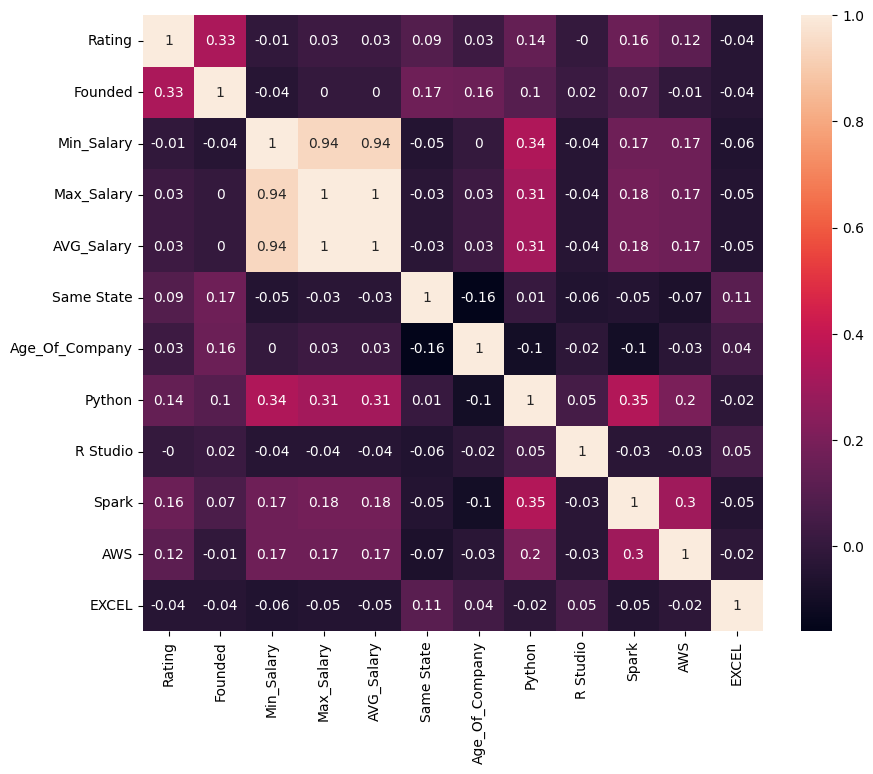

In [68]:
plt.figure(figsize=(10,8))
sns.heatmap(round(corr,2), annot=True)
plt.show()

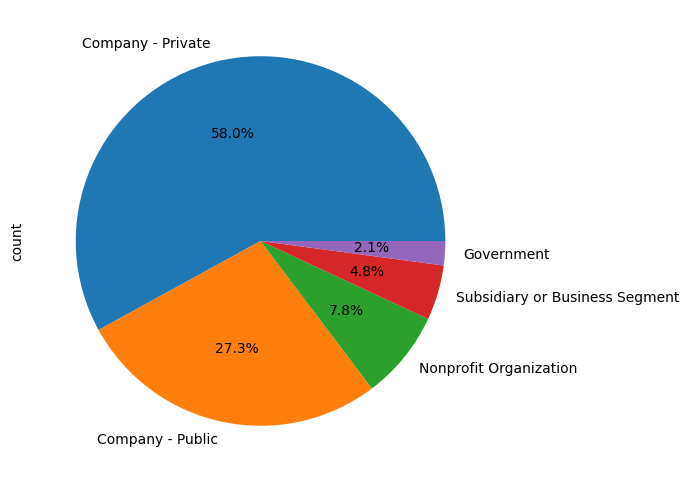

In [69]:
plt.figure(figsize=(12,6))
df['Type of ownership'].value_counts()[:5].plot(kind='pie', autopct='%1.1f%%')
plt.show()

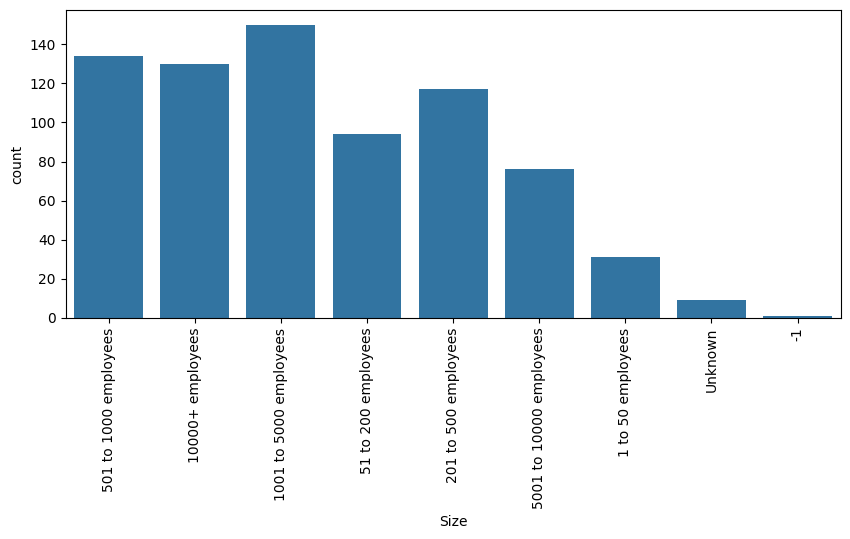

In [70]:
plt.figure(figsize=(10,4))
sns.countplot(data=data, x='Size')
plt.xticks(rotation=90);
#plt.show()

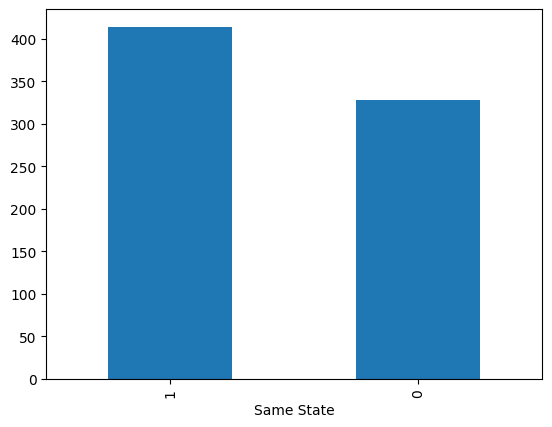

In [71]:
data['Same State'].value_counts().plot(kind='bar');

<Axes: ylabel='Company Name'>

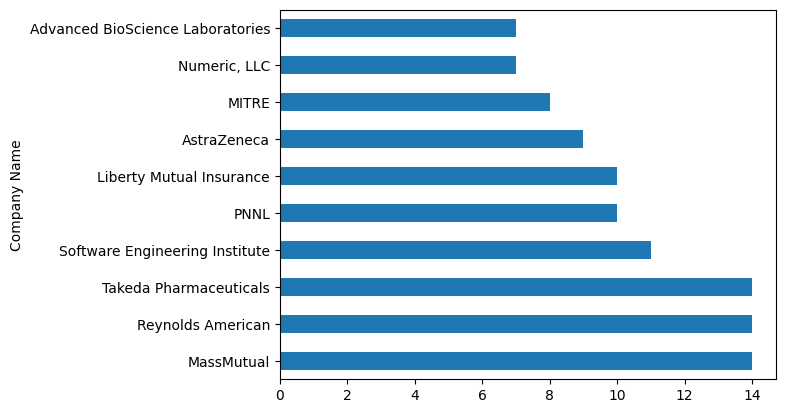

In [72]:
data['Company Name'].value_counts()[:10].plot(kind='barh')

# Job Title for max 10 Industries

<Axes: ylabel='Job Title'>

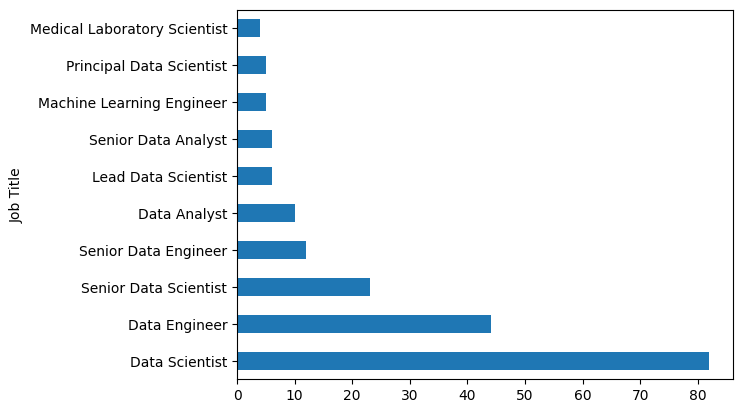

In [73]:
top_10_Industries = data['Industry'].value_counts()[:10]
filter = data['Industry'].isin(top_10_Industries.index)
data['Job Title'][filter].value_counts()[:10].plot(kind='barh')

# All Columns Visualization in one code

In [74]:
df.columns

Index(['Job Title', 'Job Description', 'Rating', 'Company Name', 'Location',
       'Headquarters', 'Size', 'Founded', 'Type of ownership', 'Industry',
       'Sector', 'Revenue', 'Competitors', 'Min_Salary', 'Max_Salary',
       'AVG_Salary', 'City', 'State', 'Same State', 'Age_Of_Company', 'Python',
       'R Studio', 'Spark', 'AWS', 'EXCEL'],
      dtype='object')

In [75]:
# df_cat = data[['Job Title', 'Job Description', 'Rating', 'Company Name', 'Location',
#        'Headquarters', 'Size', 'Founded', 'Type of ownership', 'Industry',
#        'Sector', 'Revenue', 'Competitors', 'Min_Salary', 'Max_Salary',
#        'AVG_Salary', 'City', 'State', 'Same State', 'Age_Of_Company', 'Python',
#        'R Studio', 'Spark', 'AWS', 'EXCEL']]

# for i in df_cat.columns:
#   cat_num = df_cat[i].value_counts()
#   chart = sns.barplot(x=cat_num.index, y=cat_num)
#   chart.set_xticklabels(chart.get_xticklabels(), rotation=90)
#   plt.show()

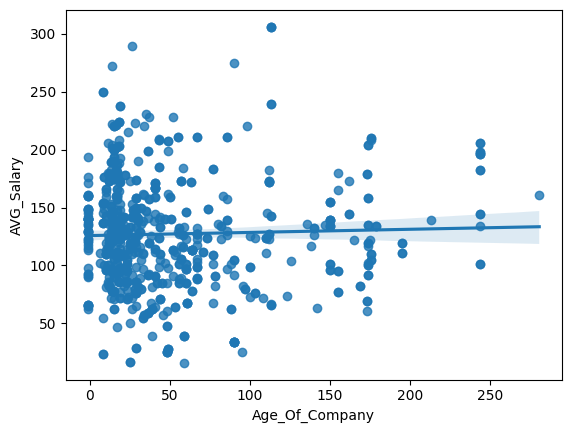

In [76]:
sns.regplot(data=data, x='Age_Of_Company',y='AVG_Salary')
plt.show()

# 7) Building Model

In [77]:
data.columns

Index(['Job Title', 'Job Description', 'Rating', 'Company Name', 'Location',
       'Headquarters', 'Size', 'Founded', 'Type of ownership', 'Industry',
       'Sector', 'Revenue', 'Competitors', 'Min_Salary', 'Max_Salary',
       'AVG_Salary', 'City', 'State', 'Same State', 'Age_Of_Company', 'Python',
       'R Studio', 'Spark', 'AWS', 'EXCEL'],
      dtype='object')

In [78]:
df_Model = data[['AVG_Salary','Rating','Size','Type of ownership','Industry','State','Same State','Age_Of_Company','Python',
'R Studio','Spark','AWS','EXCEL']]
df_Model

,AVG_Salary,Rating,Size,Type of ownership,Industry,State,Same State,Age_Of_Company,Python,R Studio,Spark,AWS,EXCEL
0,91.0,3.8,501 to 1000 employees,Company - Private,Aerospace & Defense,NM,0,52,1,0,0,0,1
1,112.0,3.4,10000+ employees,Other Organization,Health Care Services & Hospitals,MD,0,41,1,0,0,0,0
2,90.0,4.8,501 to 1000 employees,Company - Private,Security Services,FL,1,15,1,0,1,0,1
3,97.0,3.8,1001 to 5000 employees,Government,Energy,WA,1,60,1,0,0,0,0
4,143.0,2.9,51 to 200 employees,Company - Private,Advertising & Marketing,NY,1,27,1,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
950,111.0,3.9,10000+ employees,Company - Public,Biotech & Pharmaceuticals,MA,0,195,0,0,0,1,0
951,133.0,4.4,1001 to 5000 employees,Company - Public,Internet,TN,0,19,1,0,1,1,0
952,91.0,2.6,501 to 1000 employees,College / University,Colleges & Universities,PA,1,41,0,0,0,0,1
953,160.0,3.2,1 to 50 employees,Company - Private,Staffing & Outsourcing,PA,0,-1,0,0,0,0,1


In [79]:
data_Ml = pd.get_dummies(df_Model,drop_first=True)
data_Ml

,AVG_Salary,Rating,Same State,Age_Of_Company,Python,R Studio,Spark,AWS,EXCEL,Size_1 to 50 employees,...,State_ OR,State_ PA,State_ RI,State_ SC,State_ TN,State_ TX,State_ UT,State_ VA,State_ WA,State_ WI
0,91.0,3.8,0,52,1,0,0,0,1,False,...,False,False,False,False,False,False,False,False,False,False
1,112.0,3.4,0,41,1,0,0,0,0,False,...,False,False,False,False,False,False,False,False,False,False
2,90.0,4.8,1,15,1,0,1,0,1,False,...,False,False,False,False,False,False,False,False,False,False
3,97.0,3.8,1,60,1,0,0,0,0,False,...,False,False,False,False,False,False,False,False,True,False
4,143.0,2.9,1,27,1,0,0,0,1,False,...,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
950,111.0,3.9,0,195,0,0,0,1,0,False,...,False,False,False,False,False,False,False,False,False,False
951,133.0,4.4,0,19,1,0,1,1,0,False,...,False,False,False,False,True,False,False,False,False,False
952,91.0,2.6,1,41,0,0,0,0,1,False,...,False,True,False,False,False,False,False,False,False,False
953,160.0,3.2,0,-1,0,0,0,0,1,True,...,False,True,False,False,False,False,False,False,False,False


In [80]:
data_Ml = pd.get_dummies(df_Model,drop_first=True)
data_Ml.astype(int)

,AVG_Salary,Rating,Same State,Age_Of_Company,Python,R Studio,Spark,AWS,EXCEL,Size_1 to 50 employees,...,State_ OR,State_ PA,State_ RI,State_ SC,State_ TN,State_ TX,State_ UT,State_ VA,State_ WA,State_ WI
0,91,3,0,52,1,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
1,112,3,0,41,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,90,4,1,15,1,0,1,0,1,0,...,0,0,0,0,0,0,0,0,0,0
3,97,3,1,60,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
4,143,2,1,27,1,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
950,111,3,0,195,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
951,133,4,0,19,1,0,1,1,0,0,...,0,0,0,0,1,0,0,0,0,0
952,91,2,1,41,0,0,0,0,1,0,...,0,1,0,0,0,0,0,0,0,0
953,160,3,0,-1,0,0,0,0,1,1,...,0,1,0,0,0,0,0,0,0,0


In [81]:
X = data_Ml.drop('AVG_Salary',axis=1)
y = data_Ml['AVG_Salary']

In [82]:
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [83]:
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)


(593, 122)
(149, 122)
(593,)
(149,)


# LinearRegression Model

In [84]:
lr = LinearRegression()


In [85]:
lr.fit(x_train, y_train)

LinearRegression()

In [86]:
lr.score(x_train,y_train)

0.5118947660349675

In [87]:
y_pred_LR = lr.predict(x_test)

In [88]:
mean_squared_error(y_test, y_pred_LR)

1895.095293906544

# DecisionTreeRegressor

In [89]:
ds = DecisionTreeRegressor(criterion='squared_error', splitter='best', max_depth=None, min_samples_split=2, min_samples_leaf=1, min_weight_fraction_leaf=0.0, max_features=None, random_state=None, max_leaf_nodes=None, min_impurity_decrease=0.0, ccp_alpha=0.0, monotonic_cst=None)


In [90]:
ds.fit(x_train, y_train)

DecisionTreeRegressor()

In [91]:
ds.score(x_train,y_train)

0.9631341329574926

In [92]:
y_pred_ds = ds.predict(x_test)


In [93]:
mean_squared_error(y_test,y_pred_ds)

1047.4950492998591

# Support Victor Regressor

In [94]:
svr = SVR()

In [95]:
svr.fit(x_train, y_train)

SVR()

In [96]:
svr.score(x_train,y_train)

0.03293521514613895

In [97]:
y_pred_svr = svr.predict(x_test)

In [98]:
mean_squared_error(y_test,y_pred_svr)

2480.317980425714

# Random Forest Regressor

In [99]:
RF = RandomForestRegressor(n_estimators=1000,max_depth=100)

In [100]:
RF.fit(x_train, y_train)

RandomForestRegressor(max_depth=100, n_estimators=1000)

In [101]:
RF.score(x_train,y_train)

0.9120285419140519

In [102]:
y_pred_RF = RF.predict(x_test)

In [103]:
mean_squared_error(y_test,y_pred_RF)

873.0797691722368

# ADA BOOST Regressor

In [104]:
ada = AdaBoostRegressor(n_estimators=10, learning_rate=1)

In [105]:
ada.fit(x_train, y_train)

AdaBoostRegressor(learning_rate=1, n_estimators=10)

In [106]:
ada.score(x_train,y_train)

0.3706915831959321

In [107]:
y_pred_ada = ada.predict(x_test)

In [108]:
mean_squared_error(y_test,y_pred_ada)


1622.2986434086044